In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install composeml
!{sys.executable} -m pip install pandas_datareader
!{sys.executable} -m pip install featuretools
!{sys.executable} -m pip install featuretools-tsfresh-primitives
!{sys.executable} -m pip install request
!{sys.executable} -m pip install tsfresh
!{sys.executable} -m pip install Pillow
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install bokeh
!{sys.executable} -m pip install redash-client
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install diagrams
!{sys.executable} -m pip install folium






ERROR: Could not find a version that satisfies the requirement request (from versions: none)
ERROR: No matching distribution found for request


debug01
debug02


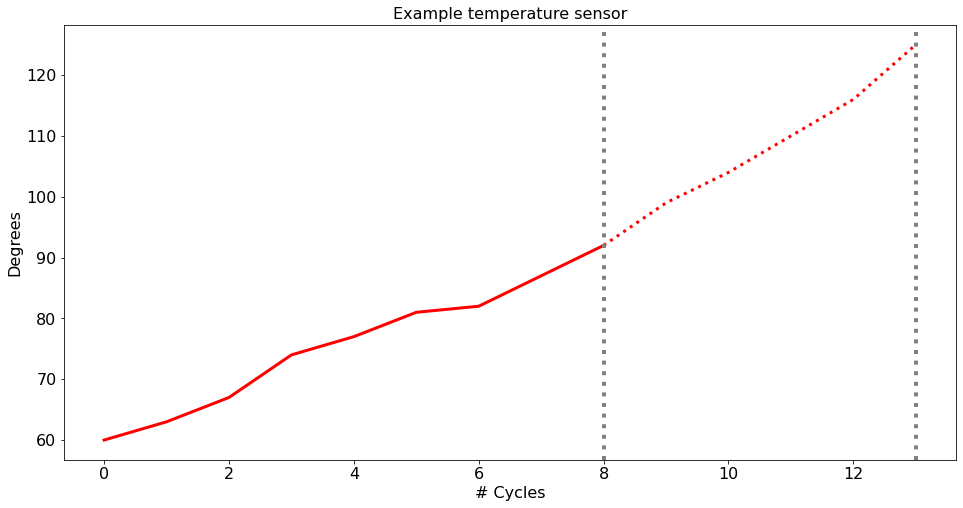

debug03
debug04
debug05
debug06
debug07
debug08
debug09
debug10
debug11
debug12
debug13


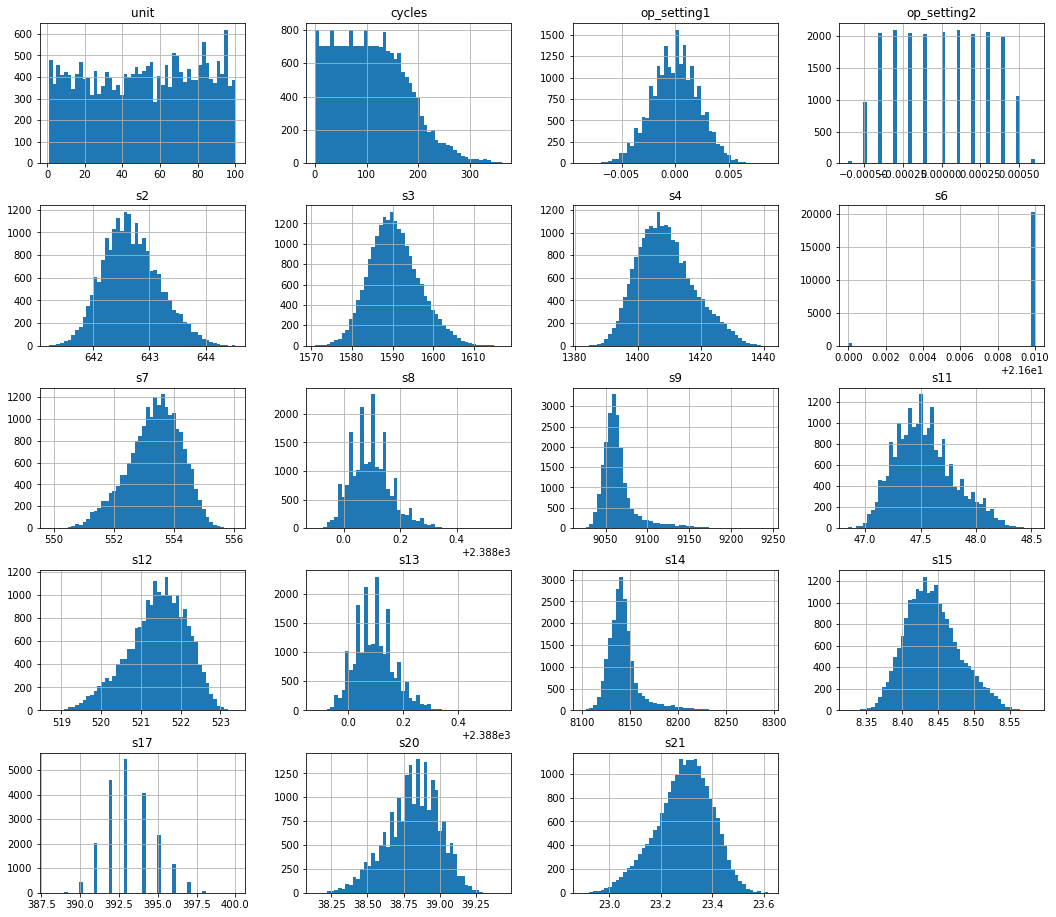

debug14
debug15


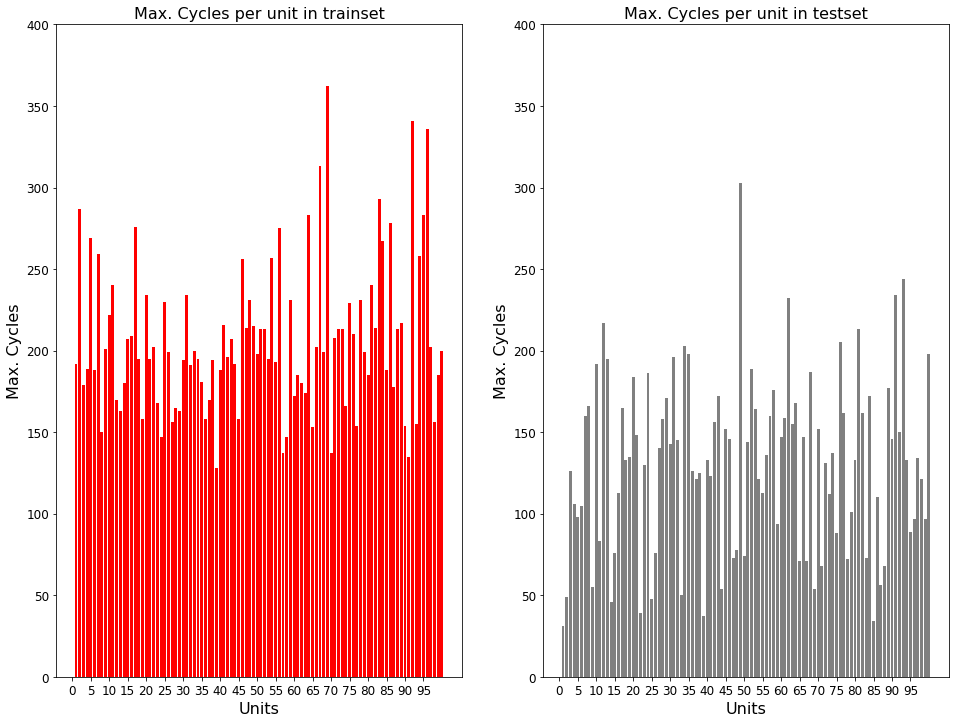

debug16


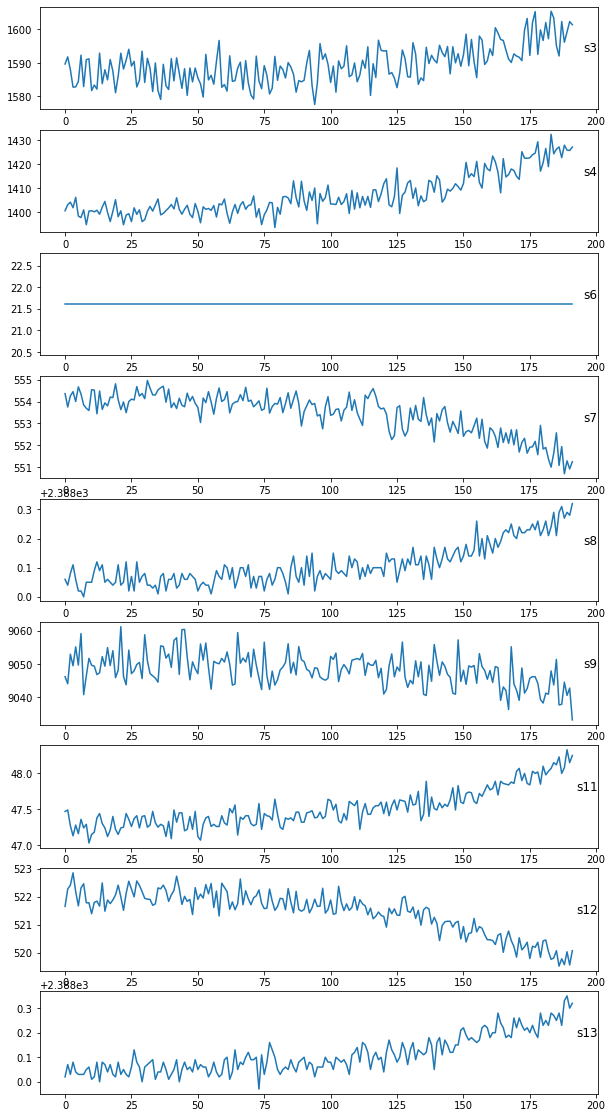

debug17


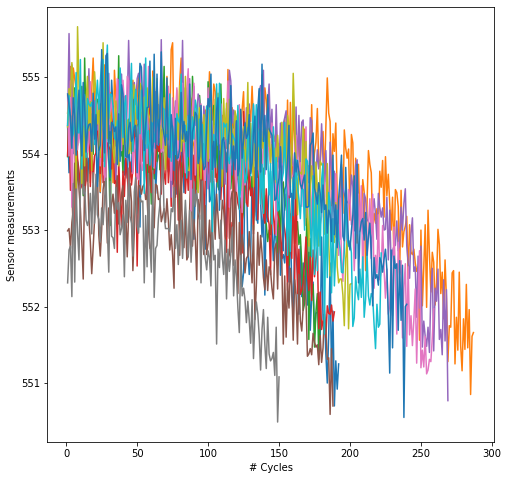

debug18
debug19


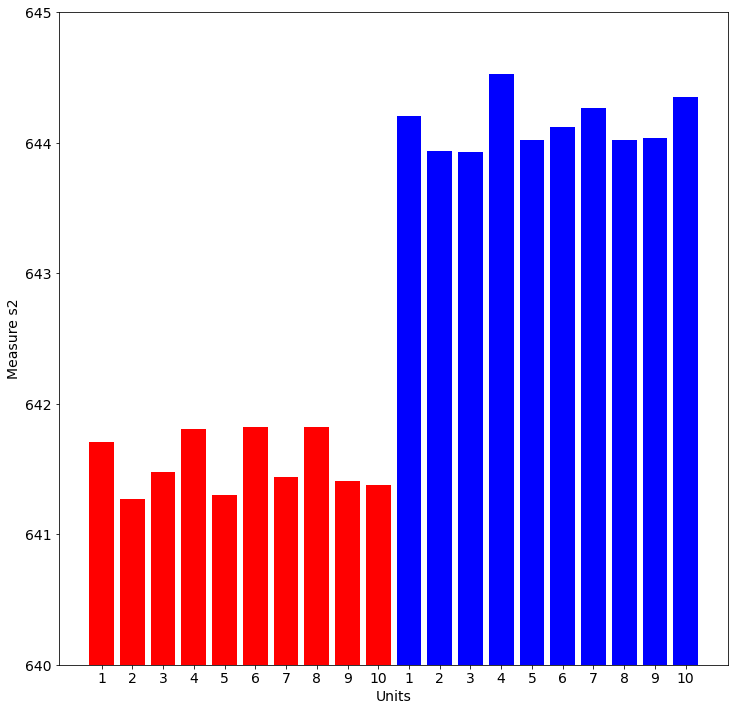

debug20
debug21
debug22
debug23
debug24
debug25
debug26
debug27
debug28
debug29
debug30
debug31
debug32


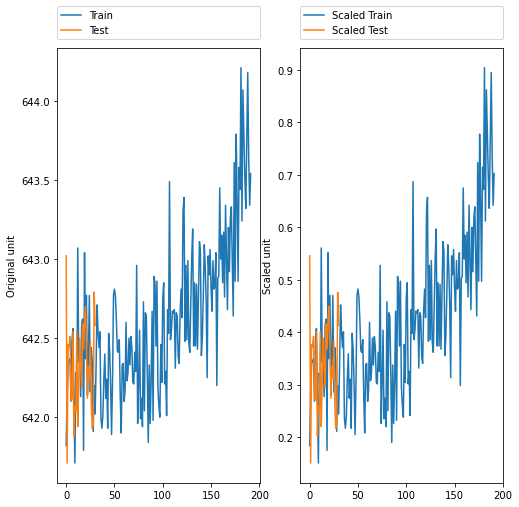

debug33
debug34
debug35


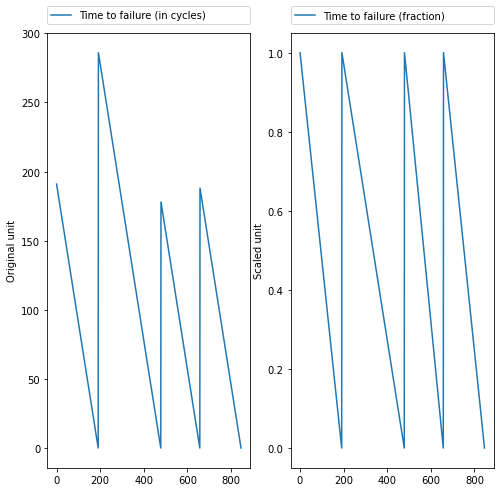

debug36
debug37
debug38
debug39
debug40
Epoch 1/20
645/645 [==============================] - 2s 3ms/step - loss: 0.2253
Epoch 2/20
645/645 [==============================] - 2s 3ms/step - loss: 0.0112
Epoch 3/20
645/645 [==============================] - 2s 2ms/step - loss: 0.0078
Epoch 4/20
645/645 [==============================] - 2s 3ms/step - loss: 0.0062
Epoch 5/20
645/645 [==============================] - 2s 2ms/step - loss: 0.0056
Epoch 6/20
645/645 [==============================] - 2s 2ms/step - loss: 0.0054
Epoch 7/20
645/645 [==============================] - 2s 2ms/step - loss: 0.0053
Epoch 8/20
645/645 [==============================] - 2s 2ms/step - loss: 0.0052
Epoch 9/20
645/645 [==============================] - 2s 2ms/step - loss: 0.0051A
Epoch 10/20
645/645 [==============================] - 2s 2ms/step - loss: 0.0053
Epoch 11/20
645/645 [==============================] - 2s 2ms/step - loss: 0.0050A: 0s - loss: 0
Epoch 12/20
645/645 [==============================

In [2]:



#SysExecutable - pip install -r requirements.txt

#https://rrighart.github.io/Gatu/

import os
import pandas as pd
import numpy as np
np.random.seed(1337)
import requests, zipfile
#import requests, zipfile, StringIO
from IPython.display import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler



print('debug01')

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows=50

print('debug02')

A=[60,63,67,74,77,81,82,87,92]
B=[92,99,104,110,116,125]
C = np.append(np.repeat(np.nan, len(A)-1), B)
plt.figure(figsize = (16, 8))
plt.plot(A, color='red', linewidth=3)
plt.plot(C, 'r:', linewidth=3)
plt.axvline(x=len(A)-1, color='grey', linestyle=':', linewidth=4)
plt.axvline(x=len(C)-1, color='grey', linestyle=':', linewidth=4)
plt.title('Example temperature sensor', fontsize=16)
plt.xlabel('# Cycles', fontsize=16)
plt.ylabel('Degrees', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

print('debug03')

#r = requests.get('https://ti.arc.nasa.gov/c/6/', stream=True)
#z = zipfile.ZipFile(StringIO.StringIO(r.content))
#z.extractall()


print('debug04')

train = pd.read_csv('train_FD001.txt', parse_dates=False, delimiter=" ", decimal=".", header=None)
test = pd.read_csv('test_FD001.txt', parse_dates=False, delimiter=" ", decimal=".", header=None)
RUL = pd.read_csv('RUL_FD001.txt', parse_dates=False, delimiter=" ", decimal=".", header=None)

print('debug05')

tableNA = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1)
tableNA.columns = ['train', 'test']
tableNA

print('debug06')

train.drop(train.columns[[-1,-2]], axis=1, inplace=True)
test.drop(test.columns[[-1,-2]], axis=1, inplace=True)

print('debug07')

cols = ['unit', 'cycles', 'op_setting1', 'op_setting2', 'op_setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
train.columns = cols
test.columns = cols

print('debug08')

train.head()

print('debug09')

test.head()

print('debug10')

RUL.head()

print('debug11')

train.describe().transpose()

print('debug12')

train.drop(['s1', 's5', 's10', 's16', 's18', 's19', 'op_setting3'], axis=1, inplace=True)
test.drop(['s1', 's5', 's10', 's16', 's18', 's19', 'op_setting3'], axis=1, inplace=True)

print('debug13')

train.hist(bins=50, figsize=(18,16))
plt.show()

print('debug14')

cyclestrain = train.groupby('unit', as_index=False)['cycles'].max()
cyclestest = test.groupby('unit', as_index=False)['cycles'].max()

print('debug15')

fig = plt.figure(figsize = (16,12))
fig.add_subplot(1,2,1)
bar_labels = list(cyclestrain['unit'])
bars = plt.bar(list(cyclestrain['unit']), cyclestrain['cycles'], color='red')
plt.ylim([0, 400])
plt.xlabel('Units', fontsize=16)
plt.ylabel('Max. Cycles', fontsize=16)
plt.title('Max. Cycles per unit in trainset', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
fig.add_subplot(1,2,2)
bars = plt.bar(list(cyclestest['unit']), cyclestest['cycles'], color='grey')
plt.ylim([0, 400])
plt.xlabel('Units', fontsize=16)
plt.ylabel('Max. Cycles', fontsize=16)
plt.title('Max. Cycles per unit in testset', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print('debug16')

values = train[train.unit==1].values
groups = [5, 6, 7, 8, 9, 10, 11,12,13]
i = 1
plt.figure(figsize=(10,20))
for group in groups:
         plt.subplot(len(groups), 1, i)
         plt.plot(values[:, group])
         plt.title(train.columns[group], y=0.5, loc='right')
         i += 1
plt.show()

print('debug17')

plt.figure(figsize = (8, 8))
plt.plot(train[train.unit==1].cycles, train[train.unit==1].s7)
plt.plot(train[train.unit==2].cycles, train[train.unit==2].s7)
plt.plot(train[train.unit==3].cycles, train[train.unit==3].s7)
plt.plot(train[train.unit==4].cycles, train[train.unit==4].s7)
plt.plot(train[train.unit==5].cycles, train[train.unit==5].s7)
plt.plot(train[train.unit==6].cycles, train[train.unit==6].s7)
plt.plot(train[train.unit==7].cycles, train[train.unit==7].s7)
plt.plot(train[train.unit==8].cycles, train[train.unit==8].s7)
plt.plot(train[train.unit==9].cycles, train[train.unit==9].s7)
plt.plot(train[train.unit==10].cycles, train[train.unit==10].s7)
plt.plot(train[train.unit==11].cycles, train[train.unit==11].s7)
plt.xlabel('# Cycles')
plt.ylabel('Sensor measurements')
plt.show()

print('debug18')

minb = train.groupby('unit', as_index=False).min().head(10)
maxb = train.groupby('unit', as_index=False).max().head(10)
mmtable = minb.append(maxb, ignore_index=True)

print('debug19')

plt.figure(figsize = (12,12))
col = np.concatenate((np.repeat('red', 10), np.repeat('blue', 10)), axis=0)
bar_labels = list(mmtable['unit'])
x_pos = list(range(len(bar_labels)))
bars = plt.bar(x_pos, mmtable['s2'], color=col)
plt.ylim([640, 645])
plt.xlabel('Units', fontsize=14)
plt.ylabel('Measure s2', fontsize=14)
plt.xticks(x_pos, bar_labels, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

print('debug20')

train = pd.merge(train, train.groupby('unit', as_index=False)['cycles'].max(), how='left', on='unit')

print('debug21')

train.rename(columns={"cycles_x": "cycles", "cycles_y": "maxcycles"}, inplace=True)

print('debug22')

train['TTF'] = train['maxcycles'] - train['cycles']

print('debug23')

scaler = MinMaxScaler()

print('debug24')

train.describe().transpose()

print('debug25')

ntrain = train.copy()

print('debug26')

ntrain.iloc[:,2:19] = scaler.fit_transform(ntrain.iloc[:,2:19])

print('debug27')

ntrain.describe().transpose()

print('debug28')

ntest = test.copy()

print('debug29')

pd.DataFrame(ntest.columns).transpose()

print('debug30')

ntest.iloc[:,2:19] = scaler.transform(ntest.iloc[:,2:19])

print('debug31')

ntest.describe().transpose()

print('debug32')

fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1,2,1)
plt.plot(train[train.unit==1].s2)
plt.plot(test[test.unit==1].s2)
plt.legend(['Train','Test'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Original unit')
fig.add_subplot(1,2,2)
plt.plot(ntrain[ntrain.unit==1].s2)
plt.plot(ntest[ntest.unit==1].s2)
plt.legend(['Scaled Train','Scaled Test'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Scaled unit')
plt.show()

print('debug33')

def fractionTTF(dat,q):
    return(dat.TTF[q]-dat.TTF.min()) / float(dat.TTF.max()-dat.TTF.min())

print('debug34')

fTTFz = []
fTTF = []

for i in range(train['unit'].min(),train['unit'].max()+1):
    dat=train[train.unit==i]
    dat = dat.reset_index(drop=True)
    for q in range(len(dat)):
        fTTFz = fractionTTF(dat, q)
        fTTF.append(fTTFz)
ntrain['fTTF'] = fTTF

print('debug35')

mx = cyclestrain.iloc[0:4,1].sum()

fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1,2,1)
plt.plot(ntrain.TTF[0:mx])
plt.legend(['Time to failure (in cycles)'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Original unit')
fig.add_subplot(1,2,2)
plt.plot(ntrain.fTTF[0:mx])
plt.legend(['Time to failure (fraction)'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Scaled unit')
plt.show()

print('debug36')

ntrain['fTTF'].describe()

print('debug37')

pd.DataFrame(ntrain.columns).transpose()

print('debug38')

X_train = ntrain.values[:,1:19]
Y_train = ntrain.values[:, 21]
X_test = ntest.values[:,1:19]

print('debug39')

url = 'https://raw.githubusercontent.com/RRighart/Gatu/master/nn-18-6-1.png'
Image(url)

print('debug40')

model = Sequential()
model.add(Dense(6, input_dim=18, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, Y_train, epochs=20)

print('debug41')

score = model.predict(X_test)

print('debug42')

score[0:10]

print('debug43')

print(score.min(), score.max())

print('debug44')

test = pd.merge(test, test.groupby('unit', as_index=False)['cycles'].max(), how='left', on='unit')

print('debug45')

test.rename(columns={"cycles_x": "cycles", "cycles_y": "maxcycles"}, inplace=True)

print('debug46')

test['score'] = score

print('debug47')

test.head()

print('debug48')

def totcycles(data):
    return(data['cycles'] / (1-data['score']))
    
test['maxpredcycles'] = totcycles(test)

print('debug49')

def RULfunction(data):
    return(data['maxpredcycles'] - data['maxcycles'])

test['RUL'] = RULfunction(test)

print('debug50')

test['RUL'].head()

print('debug51')

t = test.columns == 'RUL'
ind = [i for i, x in enumerate(t) if x]

predictedRUL = []

for i in range(test.unit.min(), test.unit.max()+1):
    npredictedRUL=test[test.unit==i].iloc[test[test.unit==i].cycles.max()-1,ind]
    predictedRUL.append(npredictedRUL)
    
predictedRUL[0:10]

print('debug52')

len(predictedRUL)

print('debug53')




[192. 191. 190. 189. 188. 187. 186. 185. 184. 183. 182. 181. 180. 179.
 178. 177. 176. 175. 174. 173. 172. 171. 170. 169. 168. 167. 166. 165.
 164. 163. 162. 161. 160. 159. 158. 157. 156. 155. 154. 153. 152. 151.
 150. 149. 148. 147. 146. 145. 144. 143. 142. 141. 140. 139. 138. 137.
 136. 135. 134. 133. 132. 131. 130. 129. 128. 127. 126. 125. 124. 123.
 122. 121. 120. 119. 118. 117. 116. 115. 114. 113. 112. 111. 110. 109.
 108. 107. 106. 105. 104. 103. 102. 101. 100.  99.  98.  97.  96.  95.
  94.  93.  92.  91.  90.  89.  88.  87.  86.  85.  84.  83.  82.  81.
  80.  79.  78.  77.  76.  75.  74.  73.  72.  71.  70.  69.  68.  67.
  66.  65.  64.  63.  62.  61.  60.  59.  58.  57.  56.  55.  54.  53.
  52.  51.  50.  49.  48.  47.  46.  45.  44.  43.  42.  41.  40.  39.
  38.  37.  36.  35.  34.  33.  32.  31.  30.  29.  28.  27.  26.  25.
  24.  23.  22.  21.  20.  19.  18.  17.  16.  15.  14.  13.  12.  11.
  10.   9.   8.   7.   6.   5.   4.   3.   2.   1.]


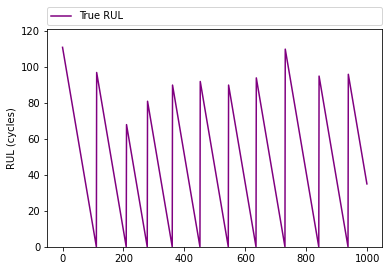

In [5]:
T2 = [list(map(int, x)) for x in predictedRUL]
#predictedRUL
T2
#predictedRUL
#len(predictedRUL)
xtrueRUL = list(RUL.loc[:,0])
otrueRUL = []

for i in range(0,len(xtrueRUL)):
    otrueRUL = np.concatenate((otrueRUL, list(reversed(np.arange(xtrueRUL[i])))))
    

xpredictedRUL = list(round(x) for x in predictedRUL)
opredictedRUL = []

opredictedRUL

sven = np.arange(192,0, -1,dtype = float)
print(sven)

#Fehler Plot - Predicted RUL
mx = 1000

#fig = plt.figure(figsize = (12, 8))
#fig.add_subplot(1,2,1)
#plt.plot(sven[0:mx], color='blue')
#plt.legend(['Predicted RUL'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
#plt.ylim(0, T2[0:mx].max()+10)
#plt.ylabel('RUL (cycles)')
#Fehler Plot Format von xpredictedRUL passt nicht, auch nicht über Umsetzung


fig.add_subplot(1,2,2)
plt.plot(otrueRUL[0:mx], color='purple')
plt.legend(['True RUL'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('RUL (cycles)')
plt.ylim(0,otrueRUL[0:mx].max()+10)
plt.show()




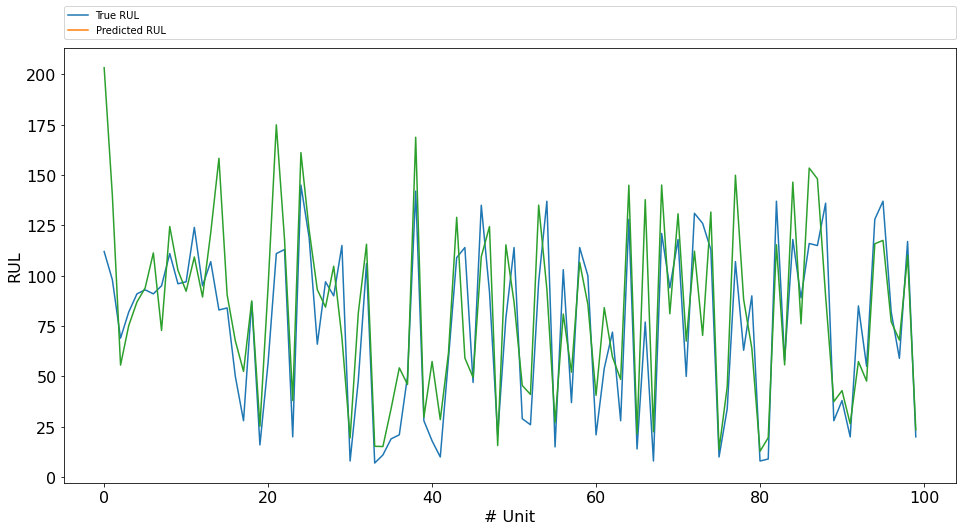

KeyError: 0

In [7]:
plt.figure(figsize = (16, 8))
plt.plot(RUL)
plt.plot(predictedRUL)
plt.xlabel('# Unit', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('RUL', fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['True RUL','Predicted RUL'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.show()

df1 = pd.concat([pd.Series(RUL[0]), pd.Series(xpredictedRUL)], axis=1)
df1.columns = ['true', 'predicted']

df1

df1['diff'] = df1['predicted']-df1['true']

df1.head()

xpredictedRUL[0:5]

df1['diff']

TTT2 = [list(map(float, x)) for x in df1['diff']]
#predictedRUL
TTT2

#histogramm muss angepasst werden für predicted Diff

plt.hist(df1['true'], bins=26, color="pink", edgecolor='brown', linewidth=1.2)
plt.axvline(0, color="red", linestyle='dashed', linewidth=1.6)
plt.show()

#histogramm muss angepasst werden für predicted Diff

RUL

colsRUL = ['RULLL', 'NAAS']
RUL.columns = colsRUL

RUL['RULLL'][1]

#MSE RUL=1N∑i=1n(Predicted−True)2  = "Mittlere Quadratische Abweichung"
#Finally, we may like to express the obtained result in a performance metric. MSE is often used in regression problems.

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(RUL['RULLL'], T2)
print(mse)

#noch Anzupassen - Predicts <0 ...==0 ...>0 ...Differenz zum RUL Vorgabe Wert

#TTT2[1]
#pd.DataFrame({'Count': [(df1['diff']<0).sum(), (df1['diff']==0).sum(), (df1['diff']>0).sum()]}, columns=['Count'], index=['Smaller', 'Zero', 'Larger'])
#pd.DataFrame({'Count': , London,Pariss=['Count'], index=['Smaller', 'Zero', 'Larger'])
              
 #cities = {"Vergleich": ["Smaller", "Zero", "Larger"], "Count":[33,4,18]}
#city_frame = pd.DataFrame(cities)
#print(city_frame)  
cities = {"Vergleich": ["Smaller", "Zero", "Larger"],
          "Count": [8615246, 3562166, 3165235]}
city_frame = pd.DataFrame(cities)
print(city_frame)

# Oject type feststellen
print(type(TTT2))
DDD2_array = np.array(TTT2)
print(type(DDD2_array))

#  https://rrighart.github.io/Gatu/
# zwischen Debug_54 und 56 - Probleme mit Object Type "xpredictedRUL"
# opredictedRUL = np.concatenate((opredictedRUL, list(reversed(np.arange(xpredictedRUL[i])))))
# ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().



In [8]:
df1 = pd.concat([pd.Series(RUL[0]), pd.Series(xpredictedRUL)], axis=1)
df1.columns = ['true', 'predicted']

df1

df1['diff'] = df1['predicted']-df1['true']

df1.head()


KeyError: 0

In [9]:
df1 = pd.concat([pd.Series(RUL[0]), pd.Series(xpredictedRUL)], axis=1)
df1.columns = ['true', 'predicted']

KeyError: 0

In [11]:
df1['diff'] = df1['predicted']-df1['true']
df1

,true,predicted,diff
0,112,"RUL 203.000 Name: 30, dtype: float64","RUL 91.000 Name: 30, dtype: float64"
1,98,"RUL 140.000 Name: 79, dtype: float64","RUL 42.000 Name: 79, dtype: float64"
2,69,"RUL 56.000 Name: 205, dtype: float64","RUL -13.000 Name: 205, dtype: float64"
3,82,"RUL 75.000 Name: 311, dtype: float64","RUL -7.000 Name: 311, dtype: float64"
4,91,"RUL 87.000 Name: 409, dtype: float64","RUL -4.000 Name: 409, dtype: float64"
...,...,...,...
95,137,"RUL 118.000 Name: 12545, dtype: float64","RUL -19.000 Name: 12545, dtype: float64"
96,82,"RUL 77.000 Name: 12679, dtype: float64","RUL -5.000 Name: 12679, dtype: float64"
97,59,"RUL 68.000 Name: 12800, dtype: float64","RUL 9.000 Name: 12800, dtype: float64"
98,117,"RUL 110.000 Name: 12897, dtype: float64","RUL -7.000 Name: 12897, dtype: float64"


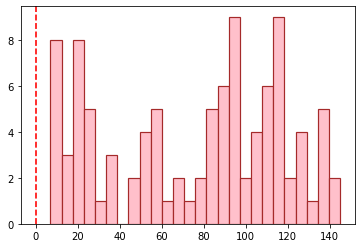

672.37
  Vergleich    Count
0   Smaller  8615246
1      Zero  3562166
2    Larger  3165235
<class 'list'>
<class 'numpy.ndarray'>


In [12]:
xpredictedRUL[0:5]

df1['diff']

TTT2 = [list(map(float, x)) for x in df1['diff']]
#predictedRUL
TTT2

#histogramm muss angepasst werden für predicted Diff

plt.hist(df1['true'], bins=26, color="pink", edgecolor='brown', linewidth=1.2)
plt.axvline(0, color="red", linestyle='dashed', linewidth=1.6)
plt.show()

#histogramm muss angepasst werden für predicted Diff

RUL

colsRUL = ['RULLL', 'NAAS']
RUL.columns = colsRUL

RUL['RULLL'][1]

#MSE RUL=1N∑i=1n(Predicted−True)2  = "Mittlere Quadratische Abweichung"
#Finally, we may like to express the obtained result in a performance metric. MSE is often used in regression problems.

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(RUL['RULLL'], T2)
print(mse)

#noch Anzupassen - Predicts <0 ...==0 ...>0 ...Differenz zum RUL Vorgabe Wert

#TTT2[1]
#pd.DataFrame({'Count': [(df1['diff']<0).sum(), (df1['diff']==0).sum(), (df1['diff']>0).sum()]}, columns=['Count'], index=['Smaller', 'Zero', 'Larger'])
#pd.DataFrame({'Count': , London,Pariss=['Count'], index=['Smaller', 'Zero', 'Larger'])
              
 #cities = {"Vergleich": ["Smaller", "Zero", "Larger"], "Count":[33,4,18]}
#city_frame = pd.DataFrame(cities)
#print(city_frame)  
cities = {"Vergleich": ["Smaller", "Zero", "Larger"],
          "Count": [8615246, 3562166, 3165235]}
city_frame = pd.DataFrame(cities)
print(city_frame)

# Oject type feststellen
print(type(TTT2))
DDD2_array = np.array(TTT2)
print(type(DDD2_array))

#  https://rrighart.github.io/Gatu/
# zwischen Debug_54 und 56 - Probleme mit Object Type "xpredictedRUL"
# opredictedRUL = np.concatenate((opredictedRUL, list(reversed(np.arange(xpredictedRUL[i])))))
# ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
